# Diagnostic figures for sources and detections
Select your setting below

In [1]:
region_name = "TDS_ELAISN1"
dets_field_id = "GNU2597664528044916736"  # Field ID to show detections from

## Show fields

In [2]:
%matplotlib widget
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

from regions import CircleSkyRegion
from astropy import units as uu
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import pixel_to_skycoord
import numpy as np

from vasca.region import Region
from vasca.field import BaseField
import vasca.visualization as vvis

from vasca.utils import mag2flux

#Load region
region_fname = "./vasca_pipeline/"+region_name+"/region_"+region_name+".fits"
rg = Region()
rg.load_from_fits(region_fname)
display(rg.tt_fields)
sel_var = rg.tt_sources["sel"]
print("Nr sources:",len(rg.tt_sources),"/",rg.tt_sources["sel"].sum())
print("Nr detections:",len(rg.tt_detections),"/",rg.tt_sources[sel_var]["nr_det"].sum())

field_id,field_name,ra,dec,observatory,obs_filter,fov_diam,sel,nr_vis,time_bin_size_sum,time_start,time_stop,rg_fd_id
,,deg,deg,,,deg,,,s,d,d,
bytes32,bytes32,float64,float64,bytes22,bytes8,float32,bool,int32,float32,float64,float64,int64
GNU2597312684324028416,PS_ELAISN1_MOS10,242.50638203682297,55.9801443588634,GALEX,NUV,1.2,True,24,29566.4,54960.17787037037,56821.33210648148,1
GNU2597383053068206080,PS_ELAISN1_MOS11,244.57200462478102,55.1825511621234,GALEX,NUV,1.2,True,25,31369.5,54960.24638888889,56815.50054271557,2
GNU2597453421812383744,PS_ELAISN1_MOS12,242.896209389035,55.0003489374844,GALEX,NUV,1.2,True,21,26349.451,54960.314884259256,56814.569061234084,3
GNU2597523790556561408,PS_ELAISN1_MOS13,241.28881797574297,55.3529870930308,GALEX,NUV,1.2,True,22,27810.902,54960.38337962963,56819.53759259259,4
GNU2597594159300739072,PS_ELAISN1_MOS14,243.95513153083402,54.1978605194106,GALEX,NUV,1.2,True,22,26881.852,54960.451886574076,56810.60611111111,5
GNU2597664528044916736,PS_ELAISN1_MOS15,242.396514585217,53.9999872930018,GALEX,NUV,1.2,True,22,28044.65,54960.52040509259,56810.67461805556,6
GNU2597734896789094400,PS_ELAISN1_MOS16,241.37385712300306,54.4519391954855,GALEX,NUV,1.2,True,21,26780.799,54960.588912037034,56807.7931854022,7
GFU2597312684324028416,PS_ELAISN1_MOS10,242.50638203682297,55.9801443588634,GALEX,FUV,1.2,True,5,6920.1,54960.17787037037,56504.46356481482,8


Nr sources: 17408 / 272
Nr detections: 183815 / 4484


## Sources

Total / selected sources: 272 / 17408 ( 1.56 %)


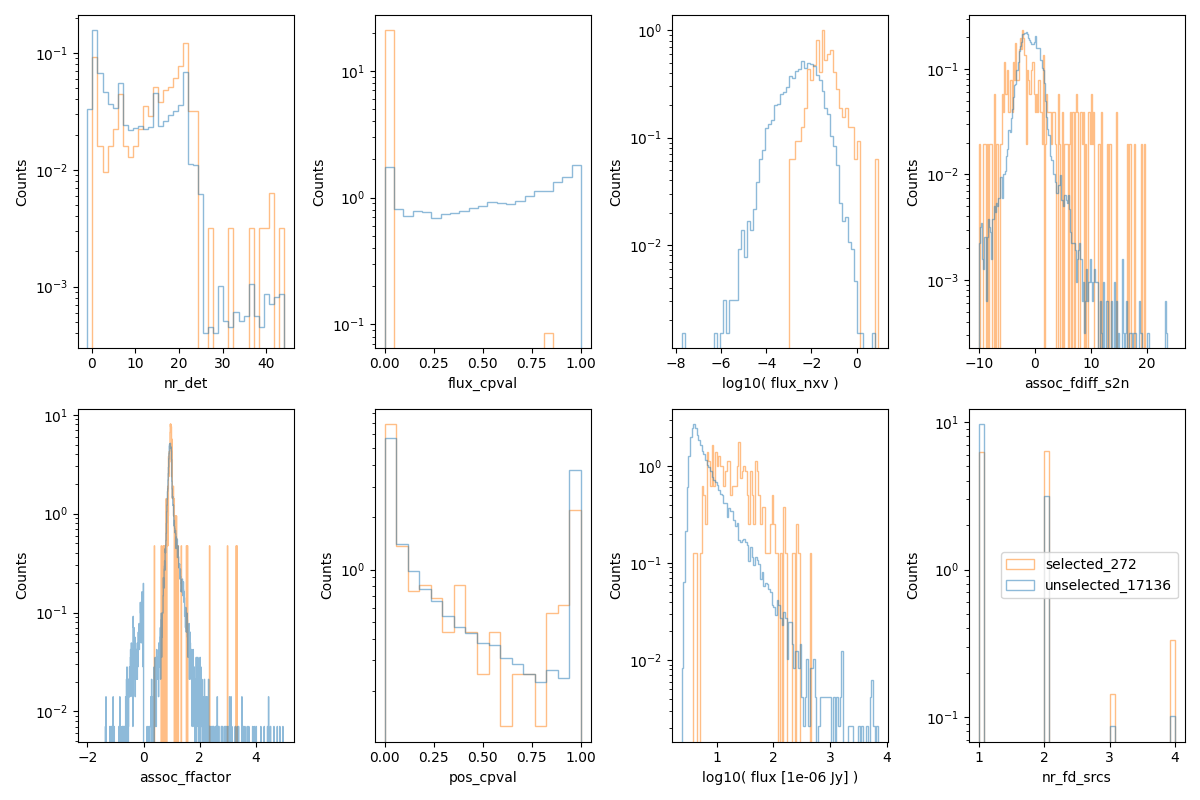

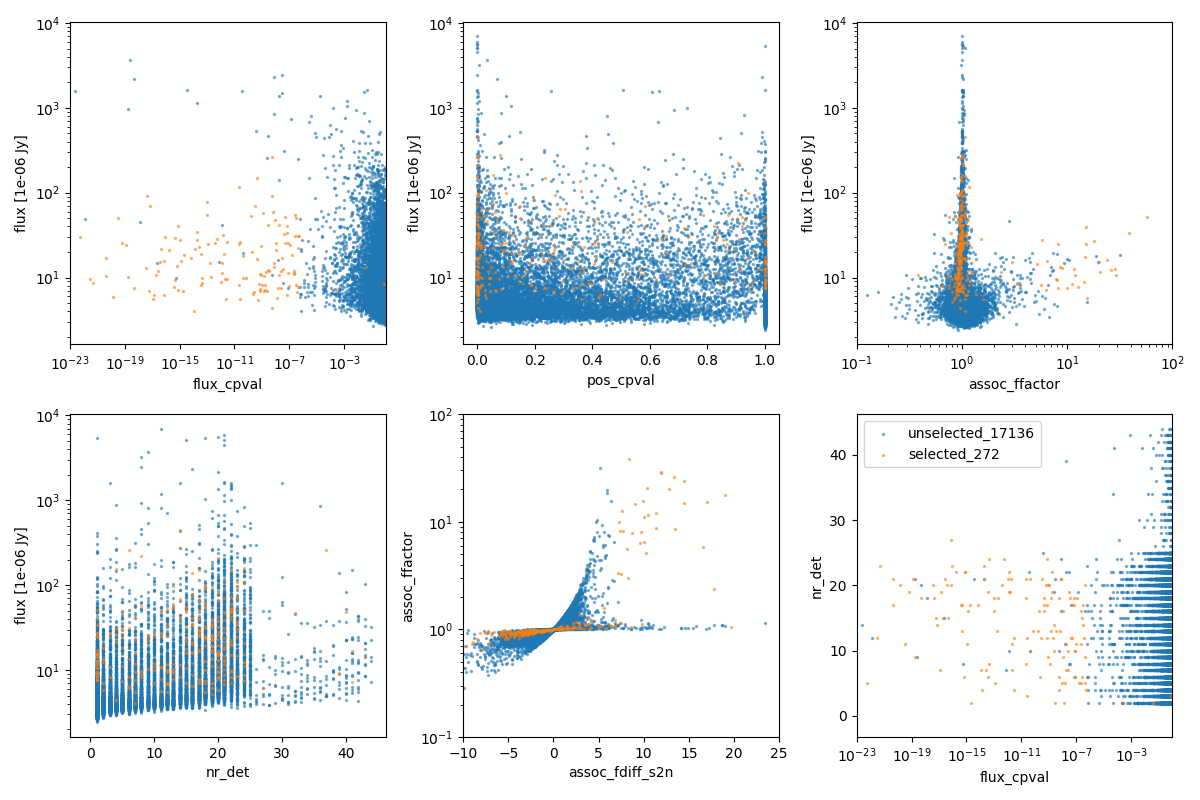

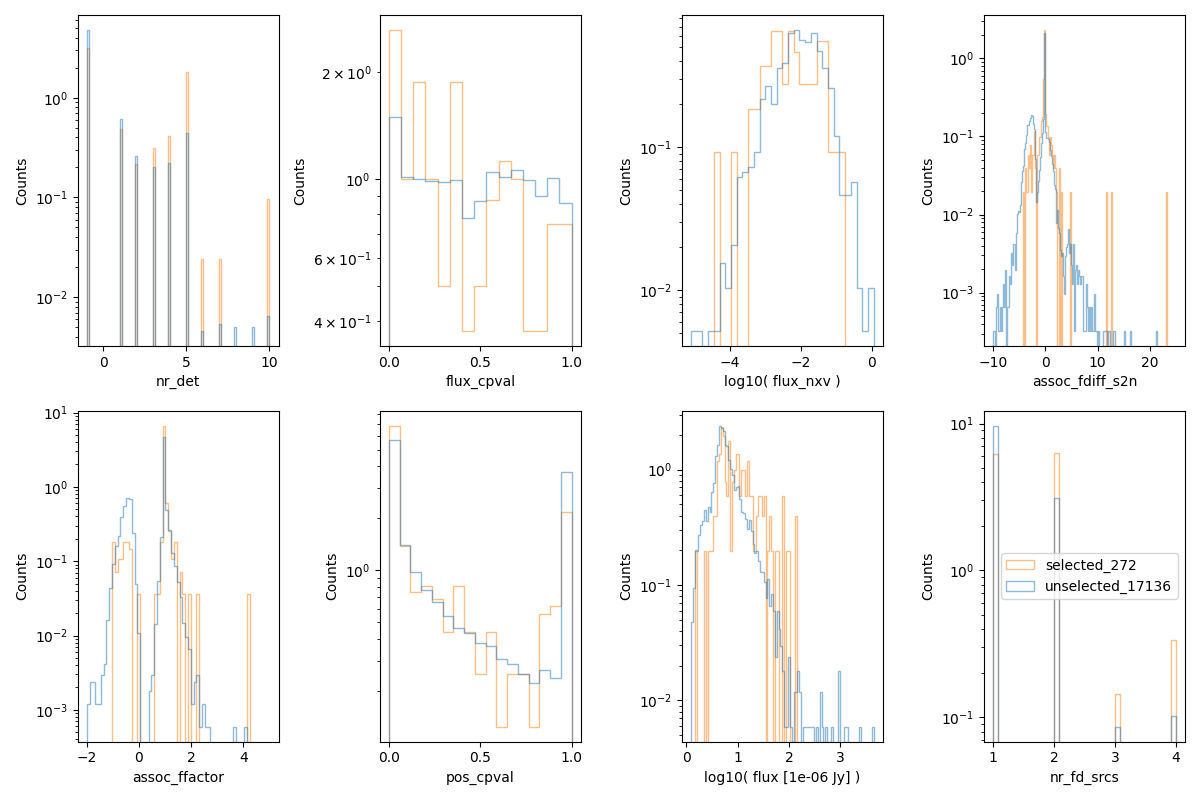

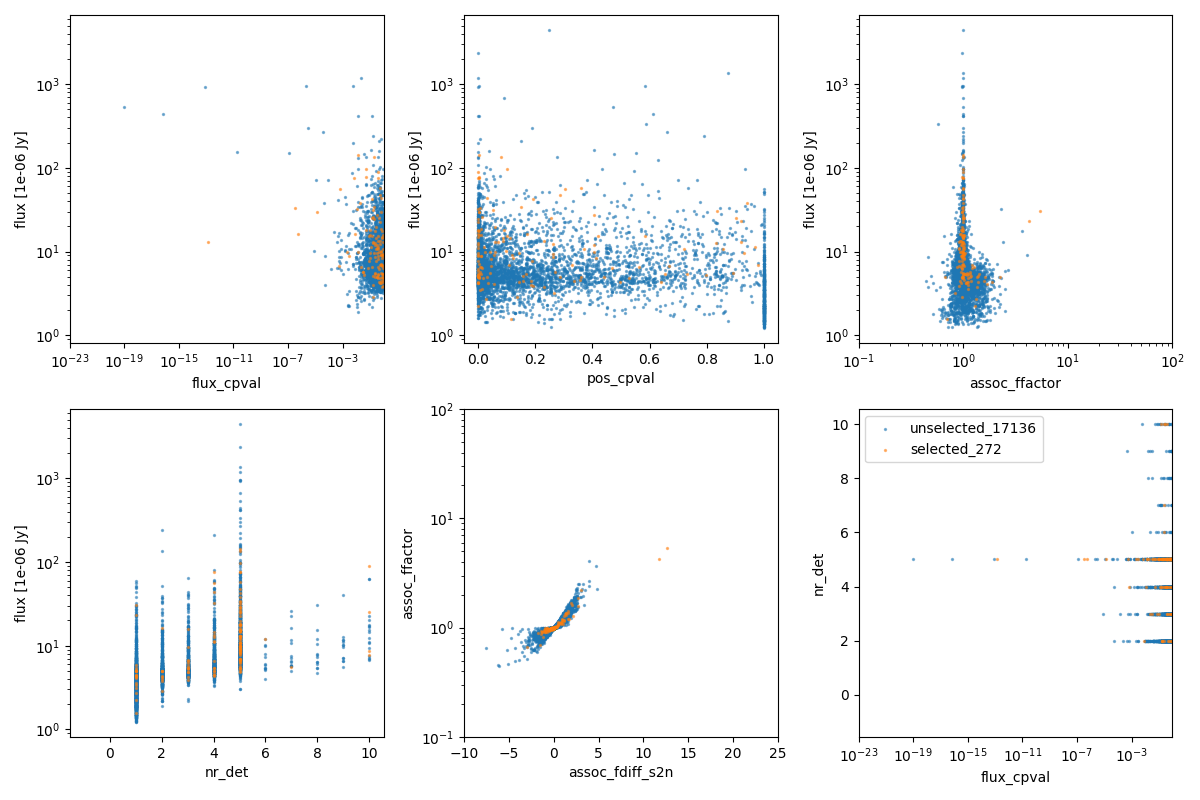

In [3]:
#_ = vvis.plot_pipe_diagnostic(rg, "tt_sources", "scatter")
_ = vvis.plot_pipe_diagnostic(rg, "tt_sources", "hist", obs_filter_id=1)
_ = vvis.plot_pipe_diagnostic(rg, "tt_sources", "scatter", obs_filter_id=1)
_ = vvis.plot_pipe_diagnostic(rg, "tt_sources", "hist", obs_filter_id=2)
_ = vvis.plot_pipe_diagnostic(rg, "tt_sources", "scatter", obs_filter_id=2)
sel= rg.tt_sources["sel"]
nr_sel_srcs =len(rg.tt_sources[sel])
nr_srcs = len(rg.tt_sources)
print("Total / selected sources:",nr_sel_srcs,"/",nr_srcs,"(",np.round(100*nr_sel_srcs/nr_srcs,2),"%)")

## Detections

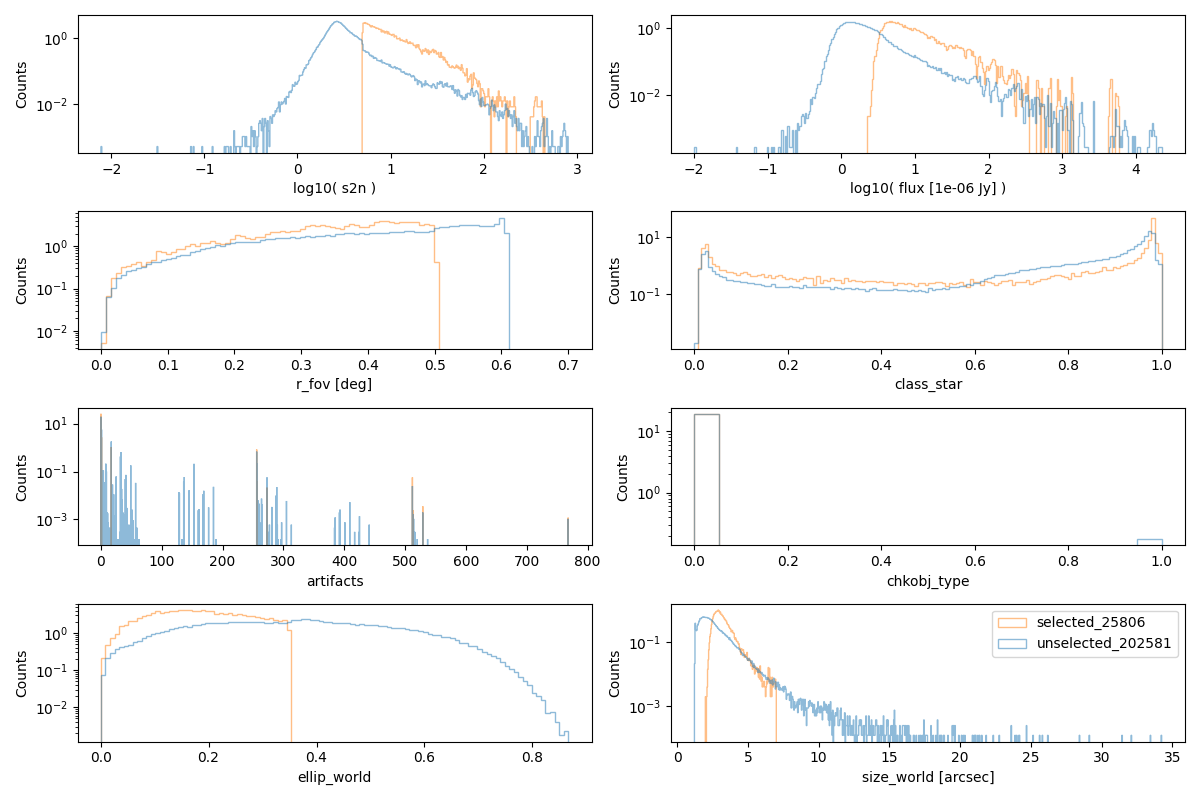

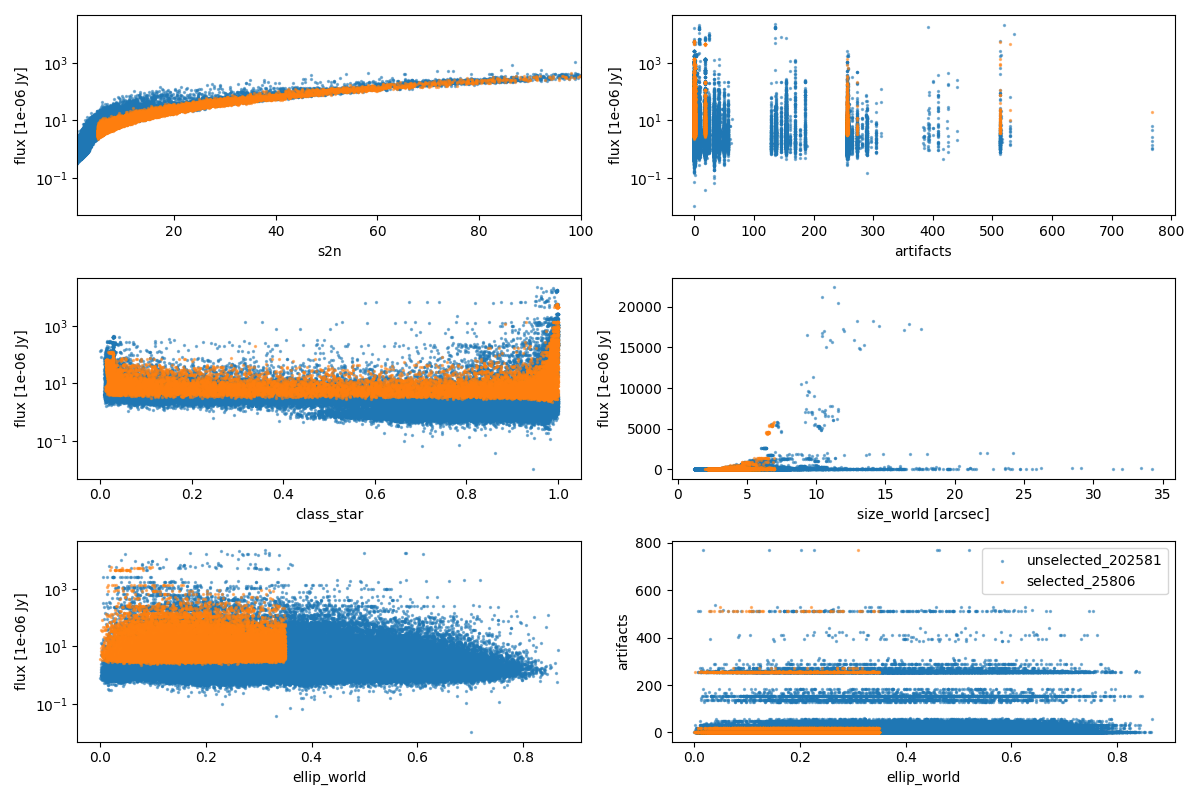

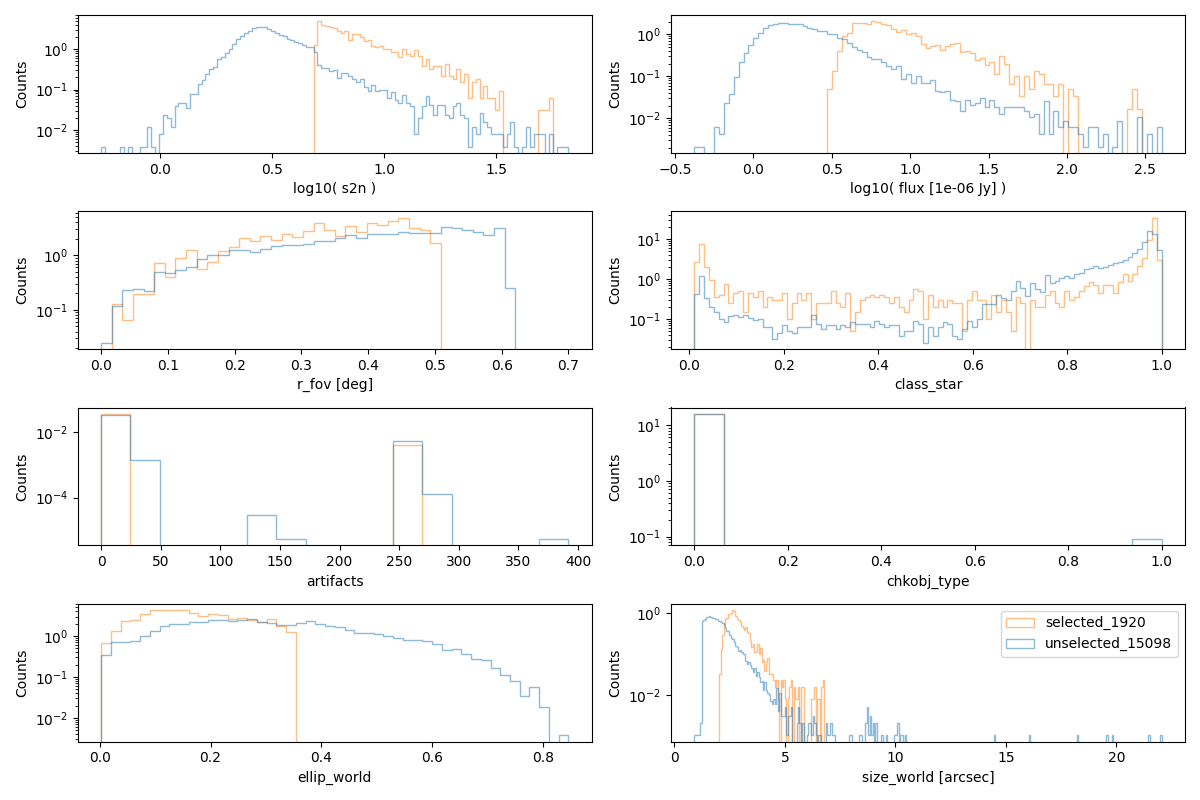

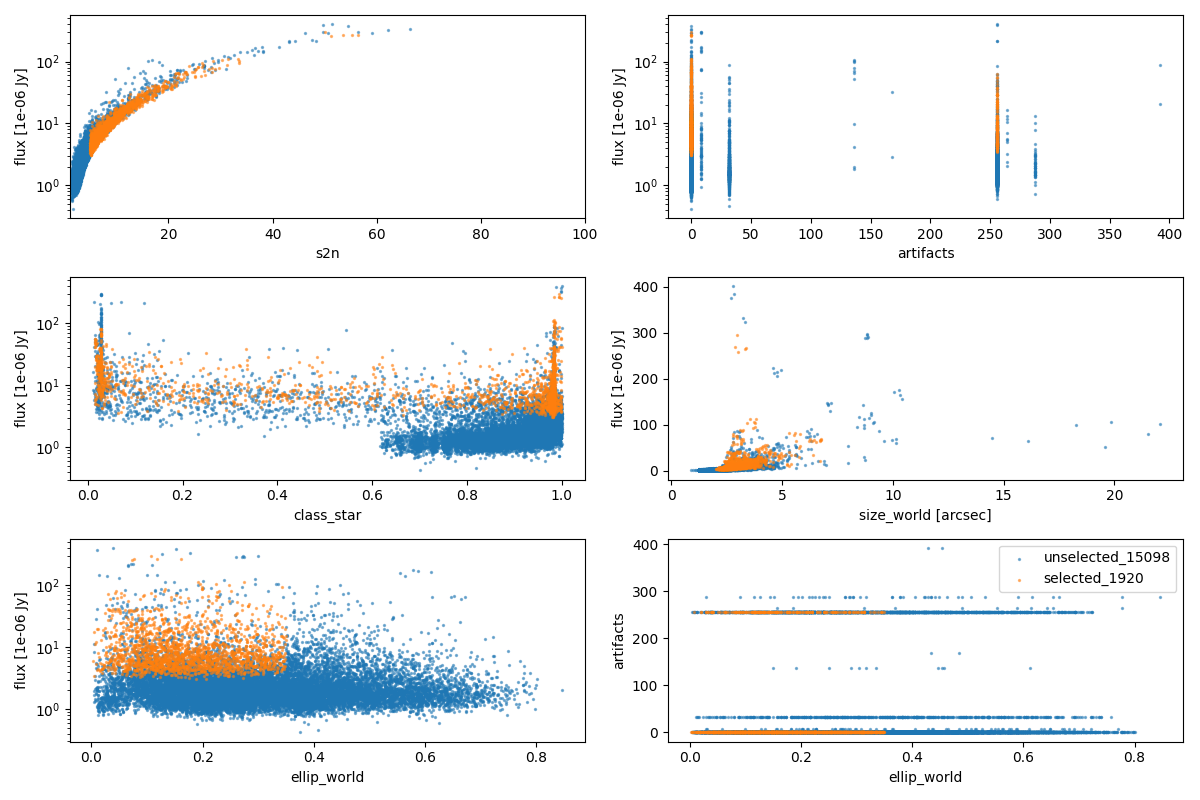

In [4]:
fd_nuv = rg.get_field(field_id=dets_field_id, load_method="FITS", add_field=True)
_ = vvis.plot_pipe_diagnostic(fd_nuv, "tt_detections", "hist", obs_filter_id=1)
_ = vvis.plot_pipe_diagnostic(fd_nuv, "tt_detections", "scatter", obs_filter_id=1)
fd_fuv = rg.get_field(field_id="GFU2597664528044916736", load_method="FITS", add_field=True)
_ = vvis.plot_pipe_diagnostic(fd_fuv, "tt_detections", "hist", obs_filter_id=2)
_ = vvis.plot_pipe_diagnostic(fd_fuv, "tt_detections", "scatter", obs_filter_id=2)